In [1]:
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report


In [2]:
dataset = pd.read_csv("facial_expressions/data/legend.csv")
dataset = dataset.drop(["user.id"], axis=1)
dataset['emotion'] = dataset['emotion'].str.lower()

In [3]:
class_mapping = dict( zip( dataset["emotion"].astype('category').cat.codes, dataset["emotion"]))
dataset["emotion_class"] = dataset["emotion"].astype('category').cat.codes

In [4]:
for i in sorted(class_mapping.keys()):
  print(i, class_mapping[i])

0 anger
1 contempt
2 disgust
3 fear
4 happiness
5 neutral
6 sadness
7 surprise


In [5]:
dataset.head(10)

,image,emotion,emotion_class
0,facial-expressions_2868588k.jpg,anger,0
1,facial-expressions_2868585k.jpg,surprise,7
2,facial-expressions_2868584k.jpg,disgust,2
3,facial-expressions_2868582k.jpg,fear,3
4,Aaron_Eckhart_0001.jpg,neutral,5
5,Aaron_Guiel_0001.jpg,happiness,4
6,Aaron_Patterson_0001.jpg,neutral,5
7,Aaron_Peirsol_0001.jpg,happiness,4
8,Aaron_Peirsol_0002.jpg,happiness,4
9,Aaron_Peirsol_0003.jpg,happiness,4


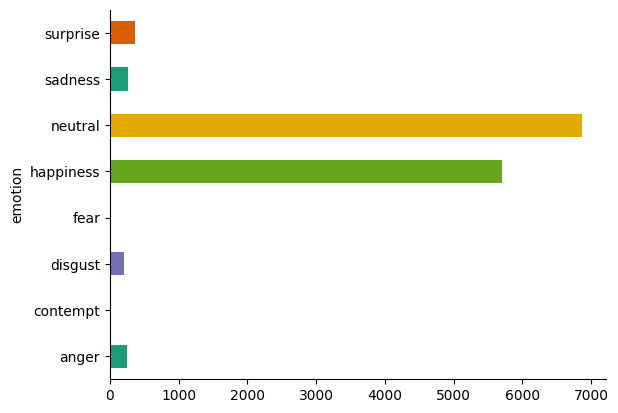

In [6]:
dataset.groupby('emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
xtrain, xval, ytrain, yval = train_test_split(dataset["image"], dataset["emotion_class"], test_size=0.2, random_state=77, stratify=dataset["emotion_class"])

In [8]:
weights = compute_class_weight(class_weight="balanced", classes=np.unique(ytrain), y=ytrain)

In [9]:
xtraindata = np.zeros((len(xtrain), 128, 128, 3))
xvaldata = np.zeros((len(xval), 128, 128, 3))
wierd_list = []
for i in range(len(xtrain)):
    xtraindata[i] = cv2.resize(cv2.imread("facial_expressions/images/" + xtrain.iloc[i]), (128,128)) / 255.             # resizing due to colab RAM constraints and then normalize

for i in range(len(xval)):
    xvaldata[i] = cv2.resize(cv2.imread("facial_expressions/images/" + xval.iloc[i]), (128,128)) / 255.

# Flattened image data for non-spatial models
xtraindata_flat = xtraindata.reshape(len(xtraindata), -1)
xvaldata_flat = xvaldata.reshape(len(xvaldata), -1)

In [15]:
ab = AdaBoostClassifier( n_estimators=50, learning_rate = 1)
ab.fit(xtraindata_flat,ytrain)

/home/dikshans/.conda/envs/sandbox/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=1)

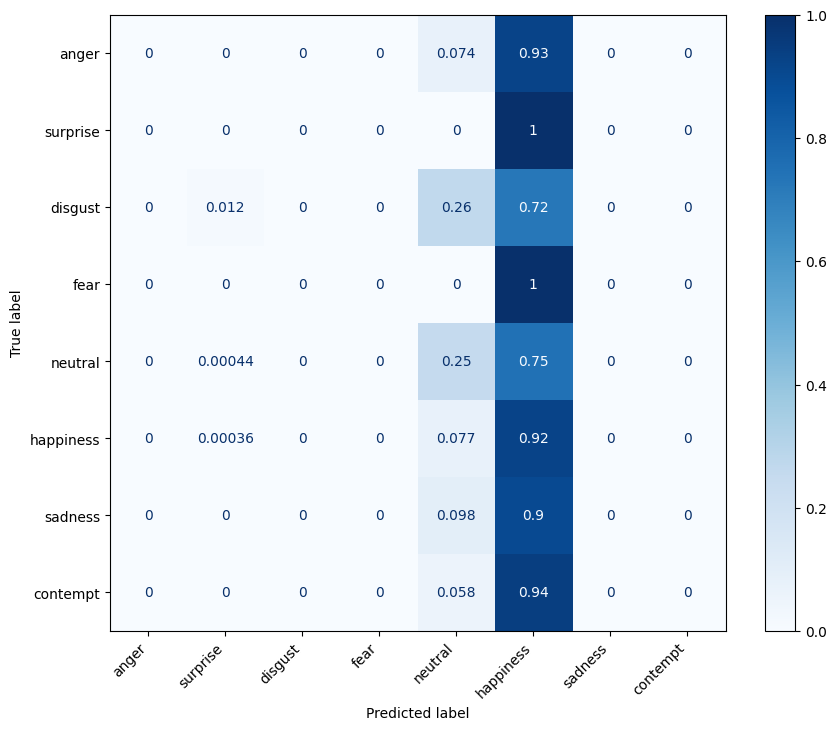

In [16]:
y_pred = ab.predict(xtraindata_flat)
cm = confusion_matrix(ytrain, y_pred, labels=ab.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(class_mapping.values()))
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(cmap='Blues', ax=ax)
plt.xticks(rotation=45, ha='right')
plt.show()

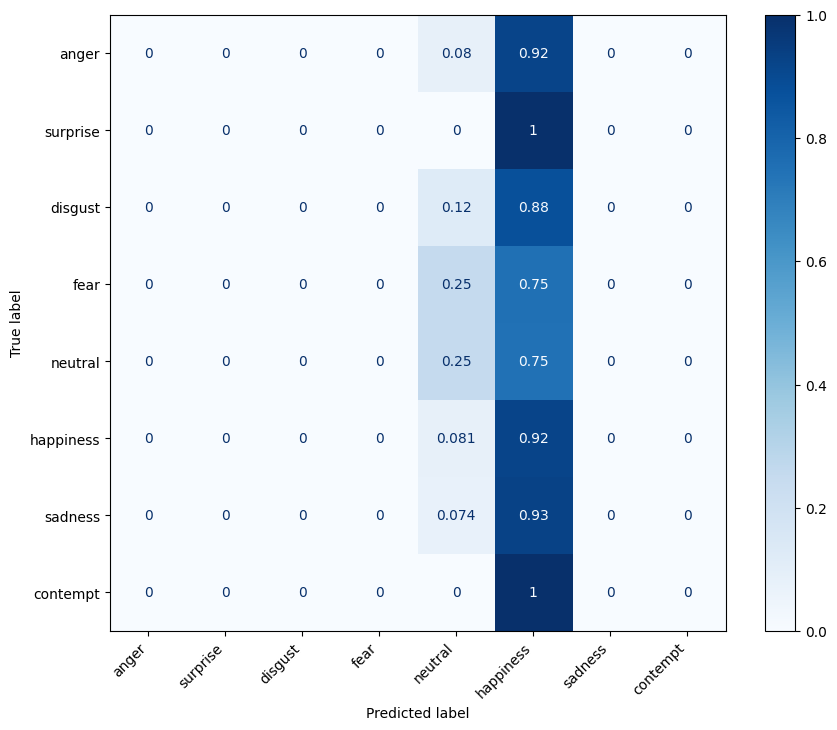

In [17]:
y_pred = ab.predict(xvaldata_flat)
cm = confusion_matrix(yval, y_pred, labels=ab.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(class_mapping.values()))
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(cmap='Blues', ax=ax)
plt.xticks(rotation=45, ha='right')
plt.show()

In [18]:
print(classification_report(yval, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        41
           3       0.00      0.00      0.00         4
           4       0.70      0.25      0.37      1139
           5       0.54      0.92      0.68      1374
           6       0.00      0.00      0.00        54
           7       0.00      0.00      0.00        74

    accuracy                           0.57      2738
   macro avg       0.15      0.15      0.13      2738
weighted avg       0.56      0.57      0.50      2738



/home/dikshans/.conda/envs/sandbox/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dikshans/.conda/envs/sandbox/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dikshans/.conda/envs/sandbox/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()